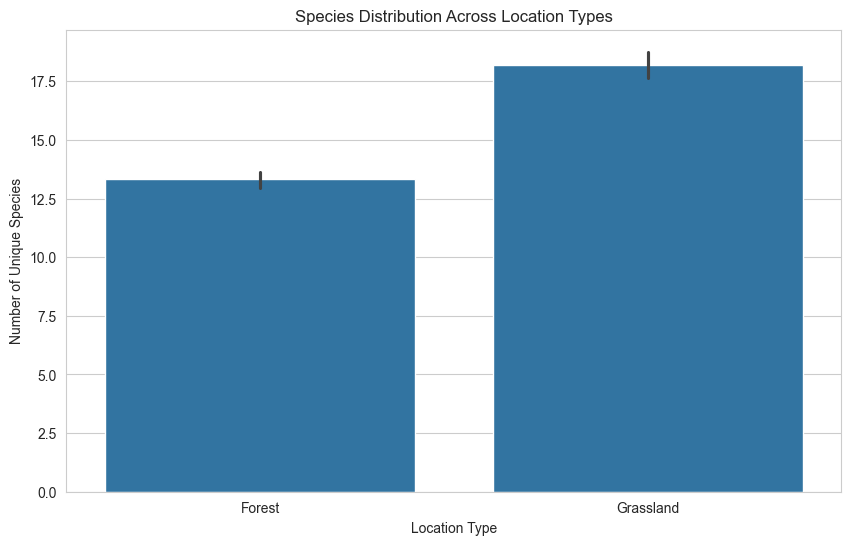

In [19]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c_forest_data=pd.read_csv("C:/Users/DEEPADHARSHINI/OneDrive/Desktop/Cleaned_Bird_Forest.csv")
c_grassland_data=pd.read_csv("C:/Users/DEEPADHARSHINI/OneDrive/Desktop/Cleaned_Bird_Grassland.csv")

combined_data=pd.concat([c_forest_data,c_grassland_data],ignore_index=True)
species_data = combined_data.groupby(['Location_Type','Plot_Name'])['Scientific_Name'].nunique().reset_index()

# Plot  across Location types
plt.figure(figsize=(10, 6))
sns.barplot(x='Location_Type', y='Scientific_Name', data=species_data)
plt.title('Species Distribution Across Location Types')
plt.xlabel('Location Type')
plt.ylabel('Number of Unique Species')
plt.show()

C:\Users\DEEPADHARSHINI\AppData\Local\Temp\ipykernel_22588\856747944.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  combined_data['Year'] = pd.to_datetime(combined_data['Date'], errors='coerce').dt.year
C:\Users\DEEPADHARSHINI\AppData\Local\Temp\ipykernel_22588\856747944.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  combined_data['Month'] = pd.to_datetime(combined_data['Date'], errors='coerce').dt.month


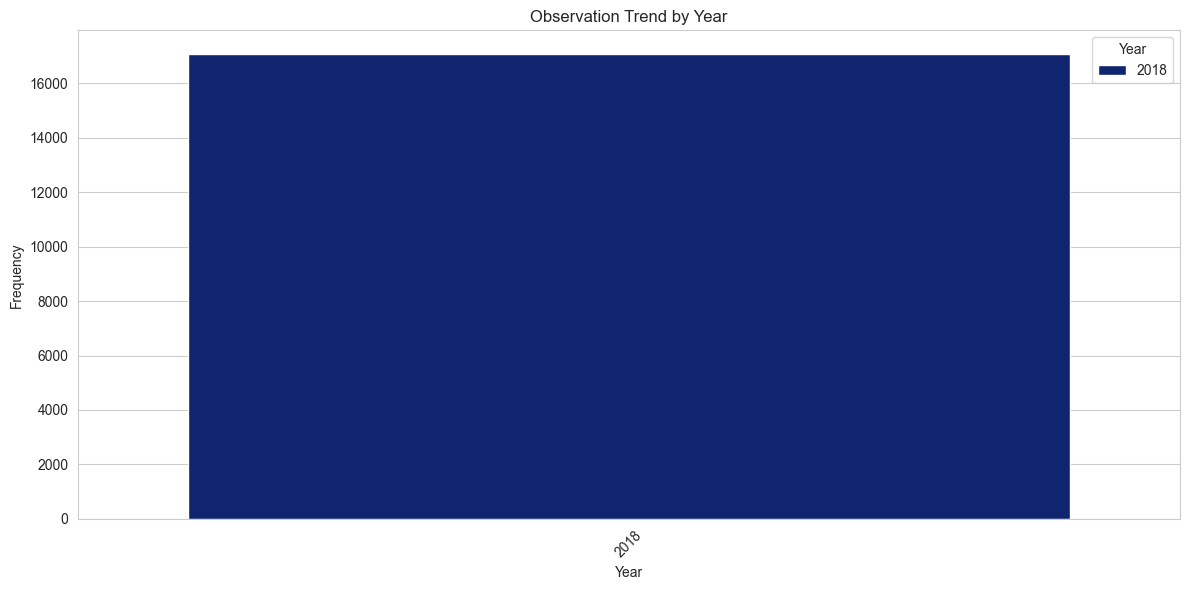

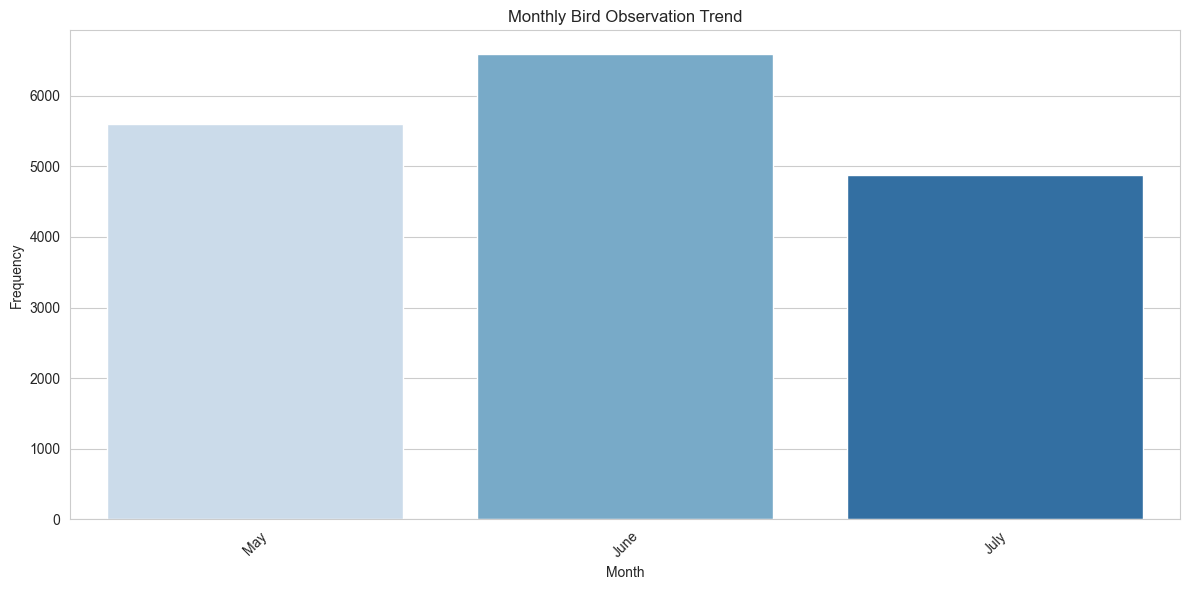

In [20]:
# Observation Bird Activity by Year and Month

# Extract Year, Month
combined_data['Year'] = pd.to_datetime(combined_data['Date'], errors='coerce').dt.year
combined_data['Month'] = pd.to_datetime(combined_data['Date'], errors='coerce').dt.month


# Map numeric months to month names
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May',
    6: 'June', 7: 'July', 8: 'August', 9: 'September', 
    10: 'October', 11: 'November', 12: 'December'
}
combined_data['Month_Name'] = combined_data['Month'].map(month_names)

# Observation Trend by Year
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='Year', data=combined_data, palette='dark', dodge=False)
plt.title('Observation Trend by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Observation Trend by Month 
plt.figure(figsize=(12, 6))
sns.countplot(x='Month_Name', hue='Month_Name', data=combined_data, palette='Blues', dodge=False)
plt.title('Monthly Bird Observation Trend')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




Summary Statistics:
         Temperature      Humidity
count  17077.000000  17077.000000
mean      22.570399     73.692112
std        4.263851     12.328380
min       11.000000      7.300000
25%       19.700001     67.500000
50%       22.299999     75.800003
75%       25.200001     83.000000
max       37.299999     98.800003


,Temperature,Humidity,Initial_Three_Min_Cnt
Temperature,1.000000,-0.353349,-0.028115
Humidity,-0.353349,1.000000,0.043873
Initial_Three_Min_Cnt,-0.028115,0.043873,1.000000


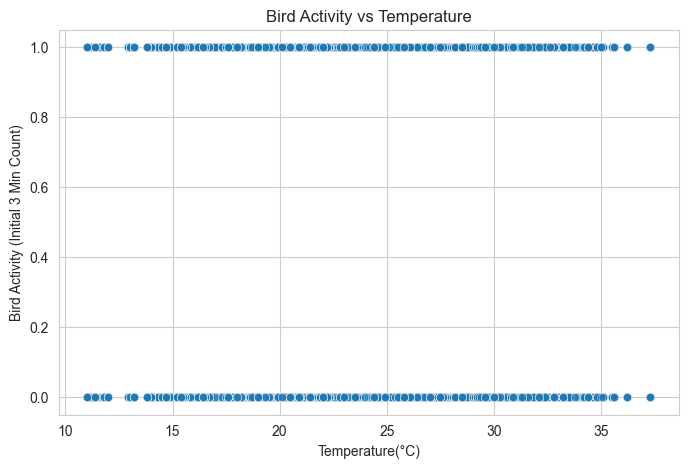

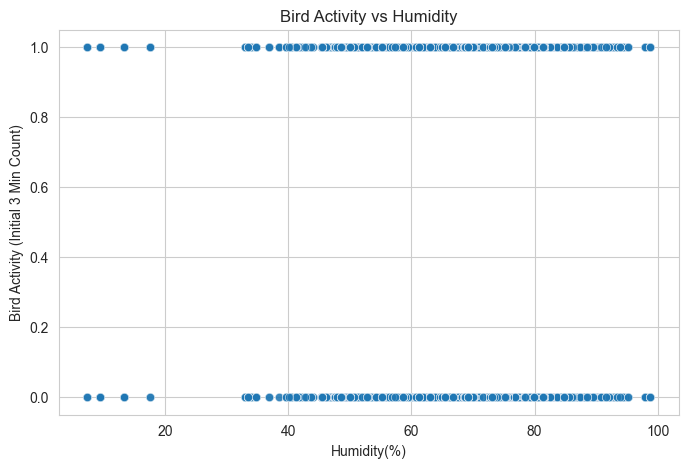

In [21]:

# Summary statistics for environmental conditions
summary_stats = combined_data[["Temperature", "Humidity"]].describe()
print("\nSummary Statistics:\n", summary_stats)

# Correlation matrix
correlation_matrix = combined_data[["Temperature", "Humidity", "Initial_Three_Min_Cnt"]].corr()
#print("\nCorrelation Matrix:\n", correlation_matrix)

style_tb=correlation_matrix.style.background_gradient(subset=['Humidity','Temperature','Initial_Three_Min_Cnt'],cmap='coolwarm')
display(style_tb)


sns.set_style("whitegrid")

# Scatter plot of Temperature vs Bird Activity
plt.figure(figsize=(8, 5))
sns.scatterplot(x=combined_data["Temperature"], y=combined_data["Initial_Three_Min_Cnt"], alpha=0.5)
plt.title("Bird Activity vs Temperature")
plt.xlabel("Temperature(°C)")
plt.ylabel("Bird Activity (Initial 3 Min Count)")
plt.show()

# Scatter plot of Humidity vs Bird Activity
plt.figure(figsize=(8, 5))
sns.scatterplot(x=combined_data["Humidity"], y=combined_data["Initial_Three_Min_Cnt"], alpha=0.5)
plt.title("Bird Activity vs Humidity")
plt.xlabel("Humidity(%)")
plt.ylabel("Bird Activity (Initial 3 Min Count)")
plt.show()






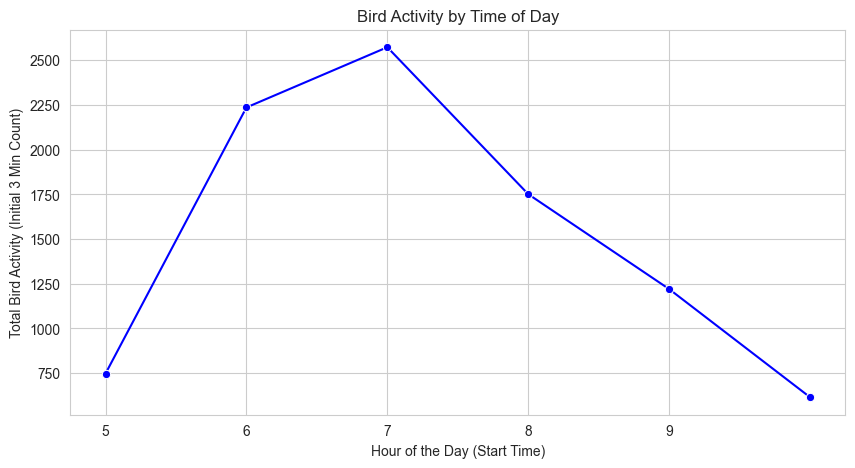

In [22]:

combined_data["Start_Time"] = pd.to_datetime(combined_data["Start_Time"], format='%H:%M:%S').dt.hour
combined_data["End_Time"] = pd.to_datetime(combined_data["End_Time"], format='%H:%M:%S').dt.hour

# Drop rows where 'Start_Time' is NaT (if any)
#combined_data = combined_data.dropna(subset=["Start_Time"])

# Group by hour to analyze bird activity by time of day
time_trends = combined_data.groupby("Start_Time")["Initial_Three_Min_Cnt"].sum().reset_index()


# Observation time trends visualization
plt.figure(figsize=(10, 5))
sns.lineplot(x=time_trends["Start_Time"], y=time_trends["Initial_Three_Min_Cnt"], marker="o",color='Blue')
plt.title("Bird Activity by Time of Day")
plt.xlabel("Hour of the Day (Start Time)")
plt.ylabel("Total Bird Activity (Initial 3 Min Count)")
plt.xticks(range(5, 10))
plt.show()

Total Unique Species Observed: 127


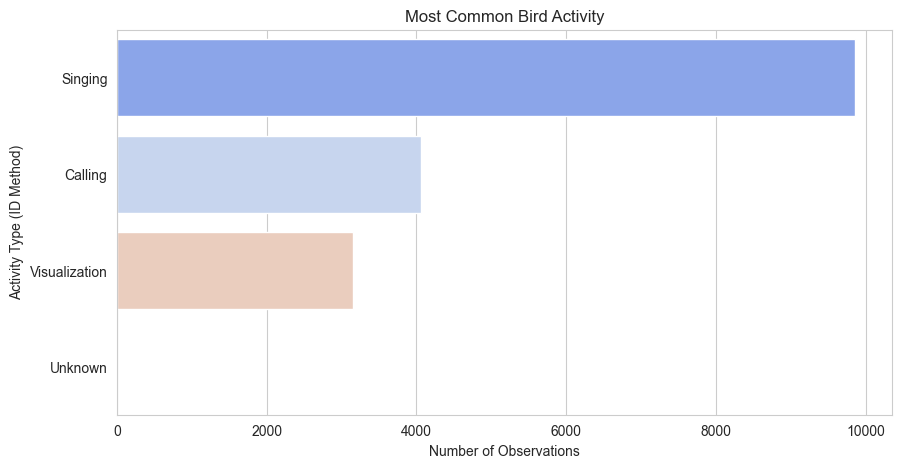

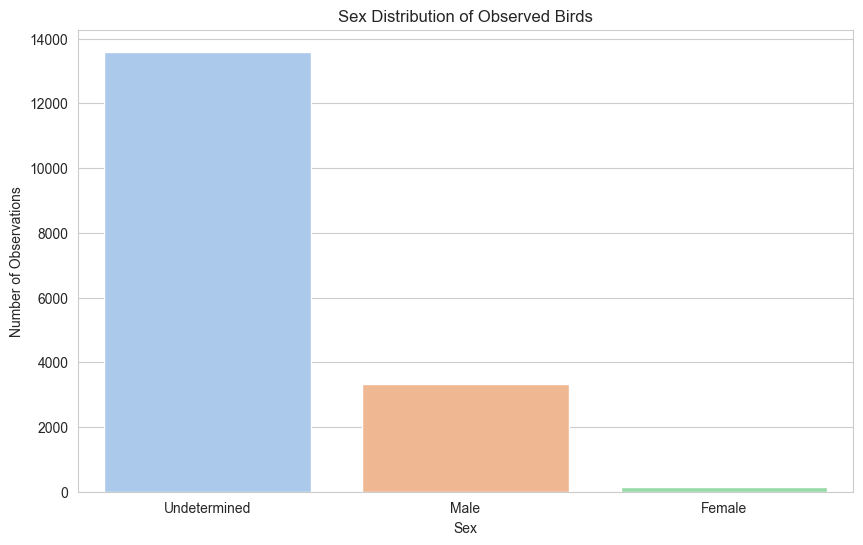

In [24]:
unique_species_count = combined_data["Scientific_Name"].nunique()
print(f"Total Unique Species Observed: {unique_species_count}")



# Activity Patterns: Check most common activity types
activity_counts = combined_data["ID_Method"].value_counts().reset_index()
activity_counts.columns = ["ID_Method", "Count"]

# Visualize activity patterns
plt.figure(figsize=(10, 5))
sns.barplot(x="Count", y="ID_Method", data=activity_counts,hue="ID_Method",legend= False, palette="coolwarm")
plt.title("Most Common Bird Activity")
plt.xlabel("Number of Observations")
plt.ylabel("Activity Type (ID Method)")
plt.show()

# Analyze Sex Ratio
sex_ratio = combined_data["Sex"].value_counts().reset_index()
sex_ratio.columns = ["Sex", "Count"]

# Visualize sex distribution
plt.figure(figsize=(10, 6))
sns.barplot(x="Sex", y="Count", data=sex_ratio,hue="Sex",legend= False, palette="pastel")
plt.title("Sex Distribution of Observed Birds")
plt.xlabel("Sex")
plt.ylabel("Number of Observations")
plt.show()